# Warren Co., 3-8818.00, CPT Analysis

In [1]:
import importlib
import csv

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## CPT Push Graphs

<i> To use the “rules of thumb” method, some helpful guidelines are to assume sands are identified when qt > 725 psi (5 MPa) and u2 ≈ uo, while the presence of intact clays are prevalent when qt < 725 psi and u2 > uo. The magnitude of porewater pressures help to indicate intact clays such as, soft (u2 ≈ 2·uo), firm (u2 ≈ 4·uo), stiff (u2 ≈ 8·uo), and hard (u2 ≈ 20·uo). Fissured overconsolidated clays tend to have negative u2 values such that u2 < 0. </i> (pg 6, Saftner, 2018)

In [4]:
# Hole 2001
name = "Hole 2001"
with open("Warren Co., 3-8818.00\\push\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]
    
push_2001 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2}

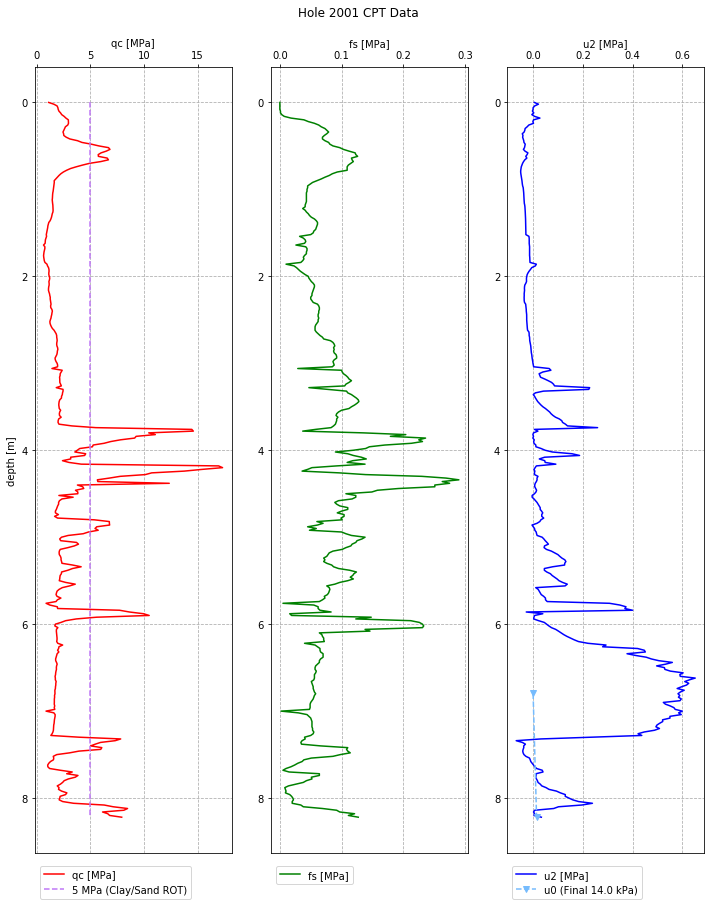

In [5]:
main.plot_push(push_2001['H [m]'],push_2001['qc [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
         title = 'Hole 2001 CPT Data',depth_unit='m',
         u0_start_m = 6.797)

In [98]:
import main
importlib.reload(main) # Reload py file to get updates in file if resaved

<module 'main' from 'C:\\Users\\clayt\\Documents\\Python Scripts\\CPTPython\\main.py'>

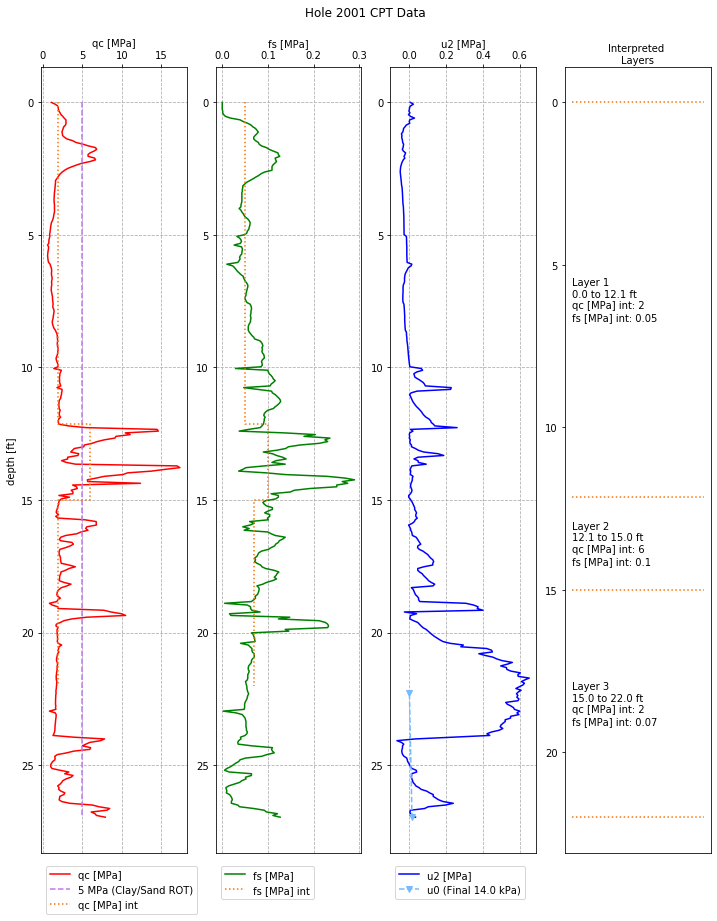

In [101]:
# Hole 2001 Interpreted Layers
int_2001 = {'layer name':   ['Layer 1','Layer 2','Layer 3'],
            'layers [m]':   [3.700,4.572,6.706],
            'qc [MPa] int': [2,6,2],
            'fs [MPa] int': [0.05,0.1,0.07]
           }

main.plot_push(push_2001['H [m]'],push_2001['qc [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
               title = 'Hole 2001 CPT Data',depth_unit='ft',
               u0_start_m = 6.797,
               int_dict=int_2001)

In [7]:
def layer_label(l_layer_name,l_layers_m):
    pass

print(main.layers_double(int_2001['layers [m]']))
print(main.double_list(int_2001['qc [MPa] int']))
print(main.double_list(int_2001['fs [MPa] int']))

[0, 3.7, 3.7, 4.572, 4.572, 6.706, 6.706, 8.22]
[2, 2, 6, 6, 2, 2, 4, 4]
[0.05, 0.05, 0.1, 0.1, 0.07, 0.07, 0.08, 0.08]


## Dissipation Tests General Information

<i>"During a pause in penetration, any excess pore pressure generated around the cone will start to dissipate. The rate of dissipation depends upon the coefficient of consolidation, which in turn, depends on the compressibility and permeability of the soil. The rate of dissipation also depends on the diameter of the probe. A dissipation test can be performed at any required depth by stopping the penetration and measuring the decay of pore pressure with time. It is common to record the time to reach 50% dissipation (t50), as shown in Figure 18. If the equilibrium pore pressure is required, the dissipation test should continue until no further dissipation is observed. This can occur rapidly in sands, but may take many hours in plastic clays. Dissipation rate increases as probe size decreases."</i> (pg 18, Robertson and Robertson, 2012)

There can be localized dissipation of pore pressure before general dissipation of pore pressure. So in stiff clay there can be an increase before there is a decrease from pore pressure at the u2 location.

Important conversions to keep in mind:
- 1 foot head ~ 0.003 MPa ~ 3 kPa
- 1 meter head = 9.81 kPa
- 1 foot head = 0.433 psi

## Coefficient of Consolidation

<img src="img\coeff of consolidation.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Hydraulic Conductivity

<img src="img\hydraulic conductivity.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Warren Co., 3-8818.00, Specific Dissipation Testing

In [8]:
Hole2001 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.DPT')
Hole2002 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2002 Test 1.DPT')
Hole2003 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-10 Warren Co S-087-2020 Hole 2003 Test 1.DPT')

In [9]:
# Dissipation Tests
for hole in [Hole2001,Hole2002,Hole2003]:
    print('Hole {}'.format(hole['Hole Number'][0]))
    for k in hole['Dissipation Test Depth (m)']:
          print('{} (m) dissapation test'.format(k))

Hole 2001
1.527 (m) dissapation test
3.047 (m) dissapation test
4.870 (m) dissapation test
6.202 (m) dissapation test
7.700 (m) dissapation test
Hole 2002
3.030 (m) dissapation test
3.590 (m) dissapation test
4.650 (m) dissapation test
6.130 (m) dissapation test
7.652 (m) dissapation test
8.660 (m) dissapation test
Hole 2003
3.090 (m) dissapation test
6.127 (m) dissapation test
7.717 (m) dissapation test
9.790 (m) dissapation test


## Summary of Dissipation Data

Hole | Depth<br/>(m) | Depth<br/>(ft) | u0 <br/>(kPa) | est. water<br/>depth <br/>(ft) | t50<br/>(secs) | t50<br/>(kPa) |
:---: | :---: |:---: | :---: |:---: | :---: | :---:|
2001|1.527|5.0|0|-1|125|-16|
2001|3.047|10.0|0|-1|375|115|
2001|4.870|16.0|0|-1|20|2|
2001|6.202|20.3|0|-1|150|300|
2001|7.700|25.3|9|22.3|25|37|
2002|3.030|9.9|0|-1|250|100|
2002|3.590|11.8|0|-1|162|262|
2002|4.650|15.3|0|-1|162|82|
2002|6.130|20.1|0|-1|150|325|
2002|7.652|25.1|2.5|24.3|N/A|N/A|
2002|8.660|28.4|13|24.1|25|22|
2003|3.090|10.1|0|-1|300|230|
2003|6.127|20.1|0|-1|N/A|N/A|
2003|7.717|25.3|9|22.3|30|20|
2003|9.790|32.1|29.4|22.3|3750|202|

## Interpretation of Dissipation Data

### Hole 2001

Hole 2001 Diss Test at 1.527 (m) [5.0 ft]


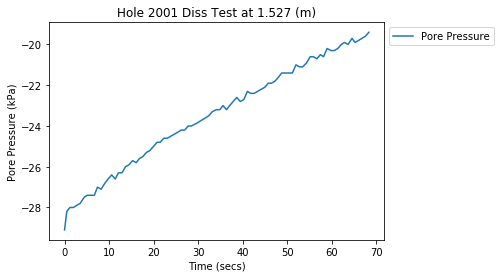

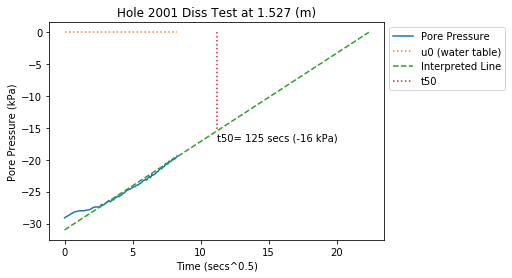

In [10]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'1.527','Hole 2001 Diss Test at 1.527 (m)',0,-31,0,500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Notes:
The dissipation test was not run long enough to get a t50 value. The pore pressure started negative and this test was above the water table. No usable information about the permiability of the soil could be obatined from this data.

Hole 2001 Diss Test at 3.047 (m) [10.0 ft]


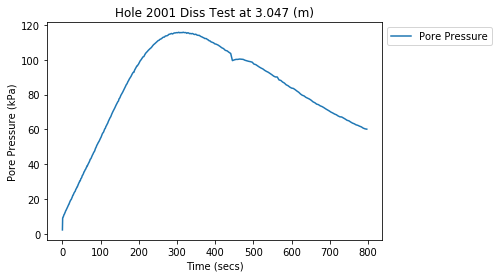

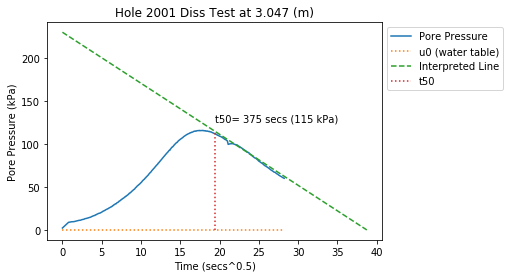

In [11]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'3.047','Hole 2001 Diss Test at 3.047 (m)',0,230,0,1500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

The test looks to be run just long enough to interprete a t50 value of 375 seconds.

Hole 2001 Diss Test at 4.870 (m) [16.0 ft]


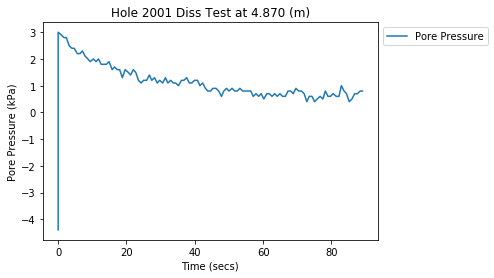

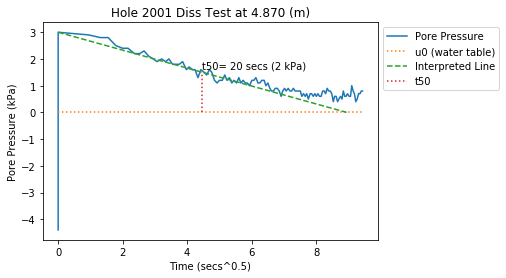

In [12]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2001,'4.870','Hole 2001 Diss Test at 4.870 (m)',0,3,0,80

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2001 Diss Test at 6.202 (m) [20.3 ft]


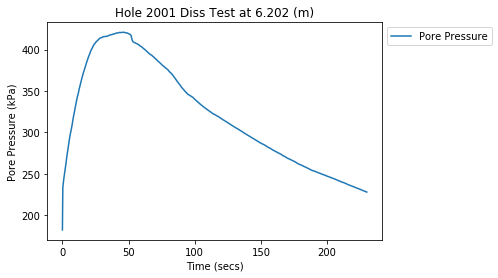

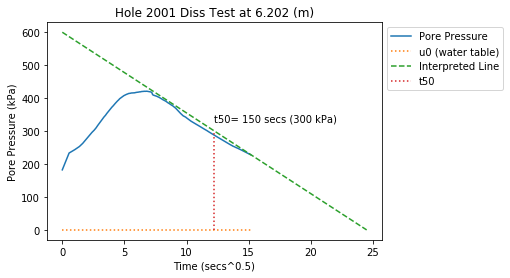

In [13]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'6.202','Hole 2001 Diss Test at 6.202 (m)',0,600,0,600
# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2001 Diss Test at 7.700 (m) [25.3 ft]
Est. water depth 22.3 (ft)


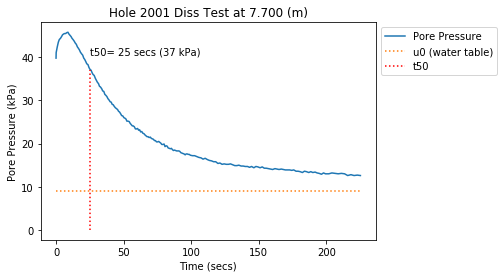

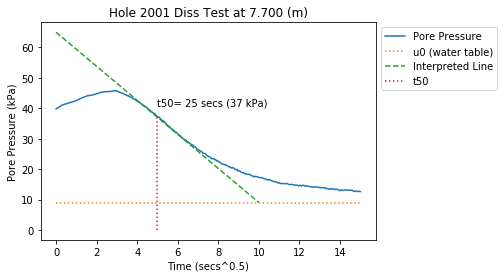

In [14]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = [Hole2001,'7.700','Hole 2001 Diss Test at 7.700 (m)',9,65,9,100]

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2002

Hole 2002 Diss Test at 3.030 (m) [9.9 ft]


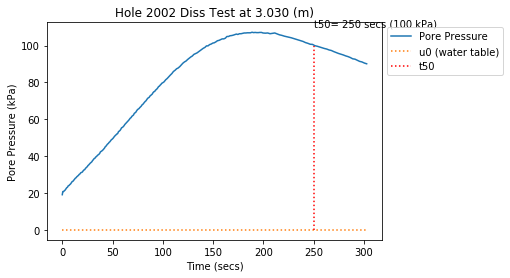

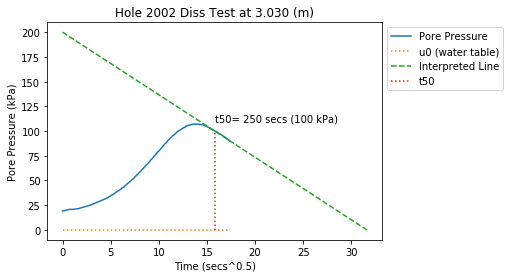

In [15]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2002,'3.030','Hole 2002 Diss Test at 3.030 (m)',0,200,0,1000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 3.590 (m) [11.8 ft]


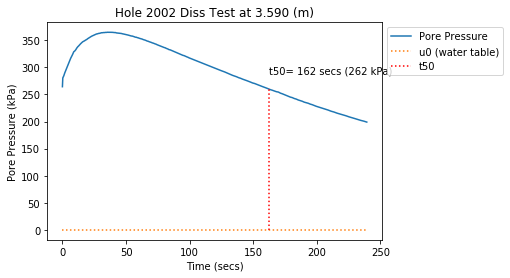

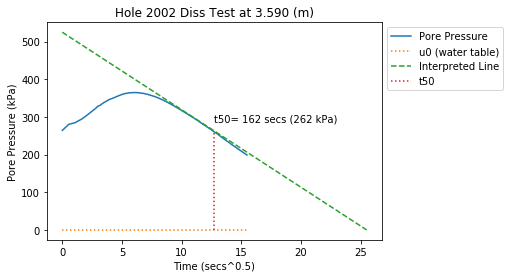

In [16]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'3.590','Hole 2002 Diss Test at 3.590 (m)',0,525,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 4.650 (m) [15.3 ft]


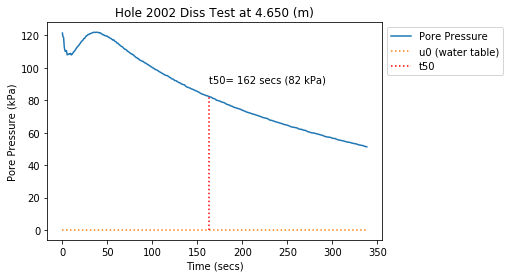

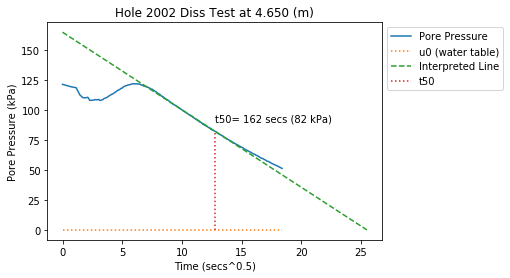

In [17]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'4.650','Hole 2002 Diss Test at 4.650 (m)',0,165,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 6.130 (m) [20.1 ft]


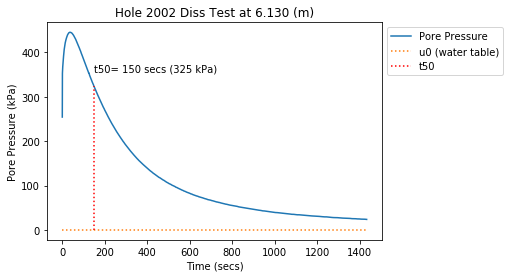

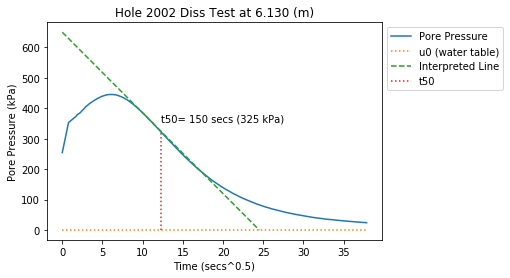

In [18]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'6.130','Hole 2002 Diss Test at 6.130 (m)',0,650,0,600

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 7.652 (m) [25.1 ft]
Est. water depth 24.3 (ft)


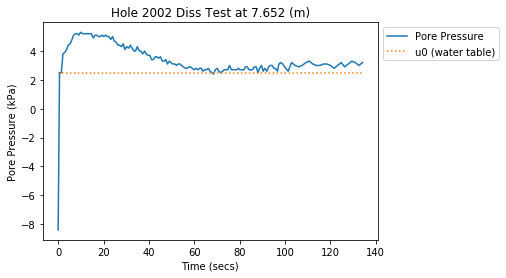

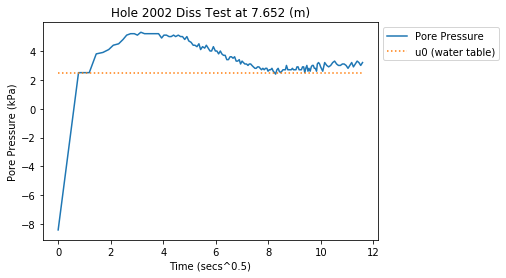

In [19]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'7.652','Hole 2002 Diss Test at 7.652 (m)',2.5,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 8.660 (m) [28.4 ft]
Est. water depth 24.1 (ft)


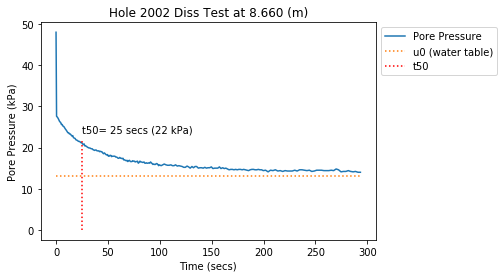

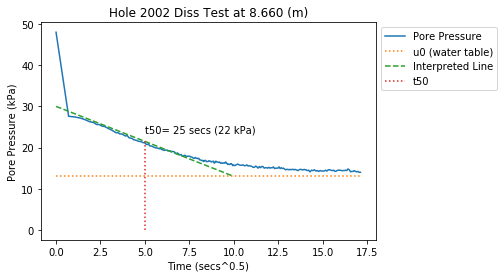

In [20]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'8.660','Hole 2002 Diss Test at 8.660 (m)',13,30,13,100

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2003

Hole 2003 Diss Test at 3.090 (m) [10.1 ft]


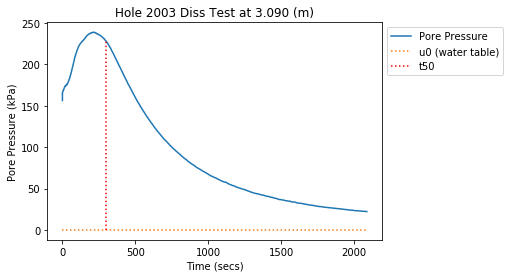

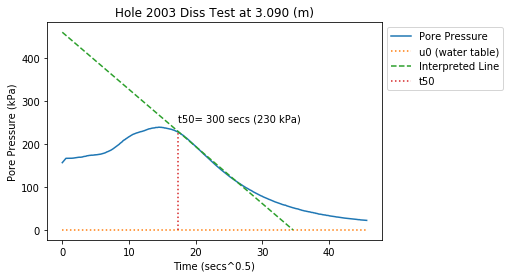

In [21]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'3.090','Hole 2003 Diss Test at 3.090 (m)',0,460,0,1200

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 6.127 (m) [20.1 ft]


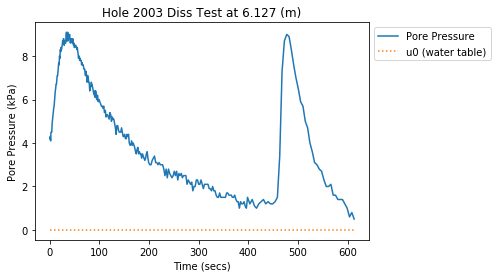

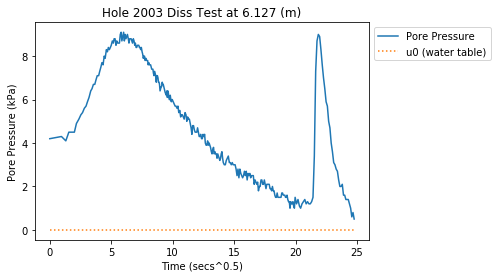

In [22]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'6.127','Hole 2003 Diss Test at 6.127 (m)',0,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 7.717 (m) [25.3 ft]
Est. water depth 22.3 (ft)


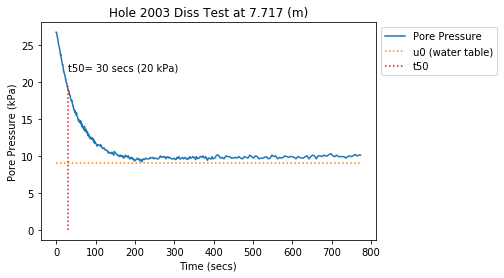

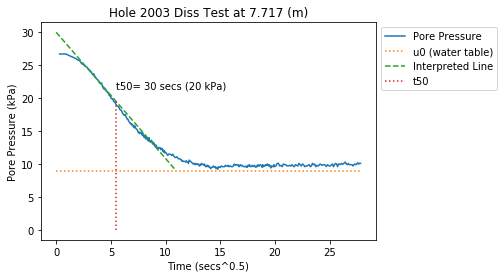

In [23]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'7.717','Hole 2003 Diss Test at 7.717 (m)',9,30,9,120

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 9.790 (m) [32.1 ft]
Est. water depth 22.3 (ft)


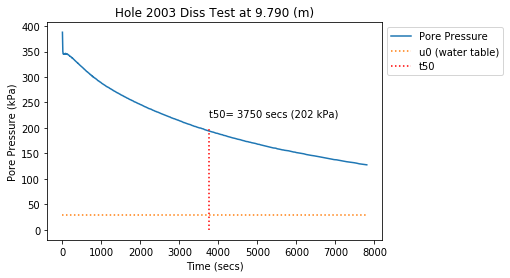

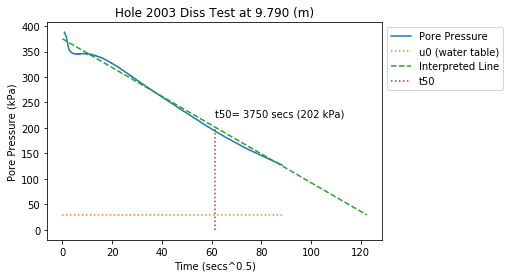

In [24]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'9.790','Hole 2003 Diss Test at 9.790 (m)',29.4,375,29.4,15000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)